In [1]:
import pandas as pd
import fpsnippets as fp

In [2]:
ball = pd.read_csv("datasets/Ballfields.csv")

In [3]:
ball.head(10)

,_id,field_name,x,y,objectid,area,perimeter,ballfields,ballfiel_1,id,polygonid,scale,angle,point_x,point_y,dpw_name,cityid,active
0,2773,McBride Park,-79.907773,40.368990,1,0.0,0.0,1.0,1.0,72,0.0,0.0,0.0,1.367323e+06,384617.783181,Mcbride,P345,Yes
1,2774,Carmalt School,-80.006456,40.386580,2,0.0,0.0,2.0,2.0,27,0.0,0.0,0.0,1.339998e+06,391710.738812,Carmalt,P299,Yes
2,2775,Sam Bryan 2,-80.006881,40.389443,3,0.0,0.0,3.0,3.0,24,0.0,0.0,0.0,1.339906e+06,392756.625499,Sam Bryen #2,P394,Yes
3,2776,Sam Bryan 1,-80.007051,40.389711,4,0.0,0.0,4.0,4.0,23,0.0,0.0,0.0,1.339862e+06,392855.383504,Sam Bryen #1,P296,Yes
4,2777,Brookline T-Ball,-80.007183,40.390456,5,0.0,0.0,5.0,5.0,22,0.0,0.0,0.0,1.339832e+06,393127.716293,Officer Stephen J. Mayhle Memorial Park,P295,Yes
5,2778,Overbrook Field 1,-79.997647,40.390765,6,0.0,0.0,6.0,6.0,88,0.0,0.0,0.0,1.342490e+06,393172.351702,Overbrook #1,P360,Yes
6,2779,Panorama,-79.922838,40.392530,7,0.0,0.0,7.0,7.0,90,0.0,0.0,0.0,1.363337e+06,393293.896078,Panorama,P362,Yes
7,2780,Overbrook Field 2,-79.997714,40.391665,8,0.0,0.0,8.0,8.0,89,0.0,0.0,0.0,1.342480e+06,393500.692909,Overbrook #2,P361,Yes
8,2781,Dan McGibbeny,-80.007422,40.391495,9,0.0,0.0,9.0,9.0,21,0.0,0.0,0.0,1.339775e+06,393507.785414,Danny McGibbeny Memorial Field,P294,Yes
9,2782,Phillips Park,-79.991223,40.392790,10,0.0,0.0,10.0,10.0,93,0.0,0.0,0.0,1.344298e+06,393864.378861,Phillips,P365,Yes


In [4]:
ll = ball.iloc[:, 2:4]
neighborhoodsB = {}
for x in range(ll.iloc[:, 0].count()):
    loc = fp.geo_to_neighborhood(ll.iloc[x, 1], ll.iloc[x, 0])
    if loc in neighborhoodsB:
        neighborhoodsB[loc] += 1
    elif loc != None:
        neighborhoodsB[loc] = 1

In [5]:
n = pd.DataFrame(neighborhoodsB.items())

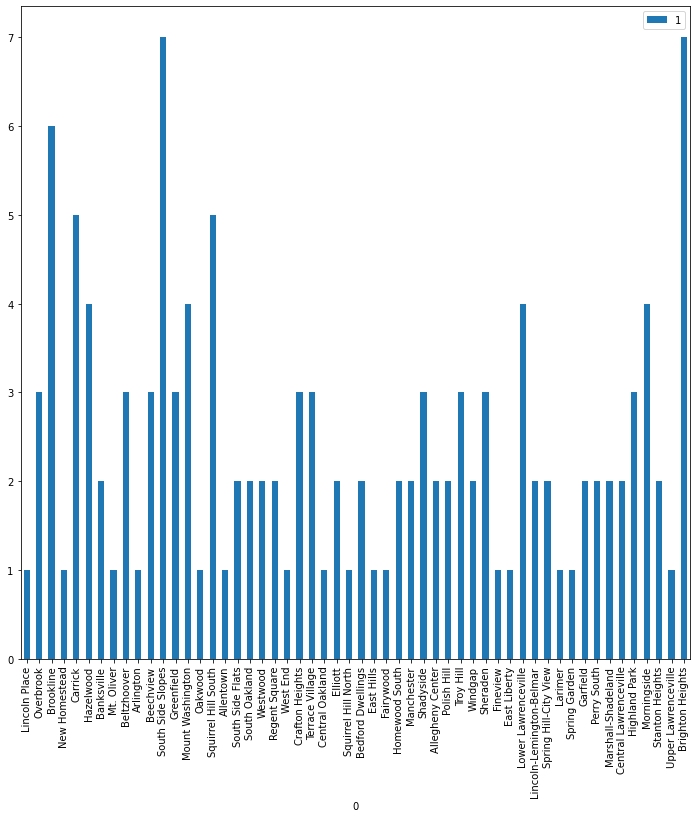

In [6]:
n.plot.bar(x=0, figsize=(12,12))

In [7]:
pools = pd.read_csv("datasets/Pools.csv")

In [8]:
pools.head(10)

,_id,id,name,type,retired,water_source,capacity,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1,899591542,Ammon,Pool,NaN,Pittsburgh Water and Sewer Authority,538000.0,https://tools.wprdc.org/images/pittsburgh/pool...,Bedford Dwellings,6,5,42003050900,3,5,2,2-5,40.448728,-79.978329
1,2,1003800828,Banksville,Pool,NaN,Pennsylvania American Water,166320.0,https://tools.wprdc.org/images/pittsburgh/pool...,Banksville,2,20,42003202300,5,20,6,4-9,40.414766,-80.040555
2,3,1688544652,Beechview Spray Park,Spray Park,NaN,Pennsylvania American Water,NaN,https://tools.wprdc.org/images/pittsburgh/pool...,Beechview,4,19,42003191600,5,19,6,4-28,40.414997,-80.019173
3,4,1533382756,Bloomfield,Pool,NaN,Pittsburgh Water and Sewer Authority,335000.0,https://tools.wprdc.org/images/pittsburgh/pool...,Bloomfield,7,8,42003080200,2,8,5,3-1,40.461997,-79.953313
4,5,1287441950,Burgwin Spray Park,Spray Park,NaN,Pittsburgh Water and Sewer Authority,NaN,https://tools.wprdc.org/images/pittsburgh/pool...,Hazelwood,5,15,42003562300,3,15,4,2-13,40.405073,-79.936899
5,6,168387727,Cowley Spray Park,Spray Park,NaN,Pittsburgh Water and Sewer Authority,NaN,https://tools.wprdc.org/images/pittsburgh/pool...,Troy Hill,1,24,42003240600,1,24,1,1-2,40.458746,-79.988369
6,7,1569871328,East Hills Spray Park,Spray Park,NaN,Wilkinsburg Penn,NaN,https://tools.wprdc.org/images/pittsburgh/pool...,East Hills,9,13,42003130600,2,13,5,3-19,40.453099,-79.871039
7,8,1475037865,Highland - Children,Pool,NaN,Pittsburgh Water and Sewer Authority,NaN,https://tools.wprdc.org/images/pittsburgh/pool...,Highland Park,7,11,42003980100,2,11,5,3-9,40.482019,-79.911283
8,9,5446687,Highland - Main,Pool,NaN,Pittsburgh Water and Sewer Authority,560242.0,https://tools.wprdc.org/images/pittsburgh/pool...,Highland Park,7,11,42003980100,2,11,5,3-9,40.482178,-79.910931
9,10,878134116,Homewood,Pool,NaN,Pittsburgh Water and Sewer Authority,171075.0,https://tools.wprdc.org/images/pittsburgh/pool...,Homewood South,9,13,42003130300,2,13,5,3-17,40.454370,-79.899884


In [9]:
ll = pools.iloc[:, 16:]
neighborhoodsP = {}
for x in range(ll.iloc[:, 0].count()):
    loc = fp.geo_to_neighborhood(ll.iloc[x, 0], ll.iloc[x, 1])
    if loc in neighborhoodsP:
        neighborhoodsP[loc] += 1
    elif loc != None:
        neighborhoodsP[loc] = 1

In [10]:
n = pd.DataFrame(neighborhoodsP.items())

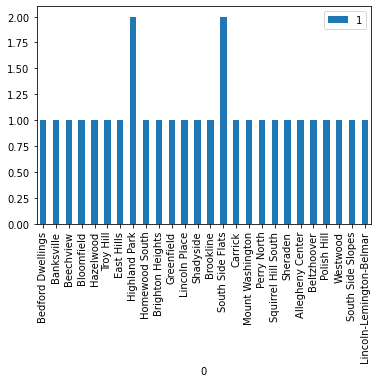

In [11]:
n.plot.bar(x=0)